In [1661]:
import pandas as pd
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier

In [1662]:
train = pd.read_csv(r'C:\Users\rlee3104\MH3\MessagePolarity_ParticipantsData\Train.csv')
test = pd.read_csv(r'C:\Users\rlee3104\MH3\MessagePolarity_ParticipantsData\Test.csv')

In [1663]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.IsGoodNews.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['IsGoodNews'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1474, 53)


C:\Users\rlee3104\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [1664]:
#14, 26, 37, 38, 36, 42, 6, 34, 27z1, 31, 24, 25, 33, 35, 41
all_data.drop(['Freq_Of_Word_41','Freq_Of_Word_25','Freq_Of_Word_33','Freq_Of_Word_38','Freq_Of_Word_39','Freq_Of_Word_29','Freq_Of_Word_30'],inplace=True , axis=1)
#all_data.drop(['Freq_Of_Word_14','Freq_Of_Word_26','Freq_Of_Word_37','Freq_Of_Word_38','Freq_Of_Word_36','Freq_Of_Word_42','Freq_Of_Word_6','Freq_Of_Word_34','Freq_Of_Word_27','Freq_Of_Word_21','Freq_Of_Word_31','Freq_Of_Word_24','Freq_Of_Word_25','Freq_Of_Word_33','Freq_Of_Word_35','Freq_Of_Word_41'],inplace=True,axis=1)

In [1665]:
#all_data['feat_1'] = all_data['StylizedLetters'] * all_data['TotalEmojiCharacters']
#all_data['feat_2'] = all_data['StylizedLetters'] * all_data['LengthOFFirstParagraph']
#all_data['feat_3'] = all_data['LengthOFFirstParagraph'] * all_data['TotalEmojiCharacters']

#all_data['feat_4'] = all_data['StylizedLetters'] * all_data['TotalEmojiCharacters'] * all_data['LengthOFFirstParagraph']
#all_data['feat_5'] = np.log(all_data['LengthOFFirstParagraph'])# / all_data['StylizedLetters'] 
#all_data['feat_6'] = np.log(all_data['TotalEmojiCharacters'])

#all_data['feat_7'] = np.log(all_data['StylizedLetters'])
#_data['feat_4'] = all_data['StylizedLetters'] - all_data['TotalEmojiCharacters']
##a#ll_data['feat_5'] = all_data['StylizedLetters'] -  all_data['LengthOFFirstParagraph']

In [1647]:
'''all_data['feat_1'] = all_data['StylizedLetters'] + all_data['TotalEmojiCharacters']
all_data['feat_2'] = all_data['StylizedLetters'] + all_data['LengthOFFirstParagraph']
all_data['feat_3'] = all_data['LengthOFFirstParagraph'] + all_data['TotalEmojiCharacters']
all_data['feat_4'] = all_data['StylizedLetters'] - all_data['TotalEmojiCharacters']
all_data['feat_5'] = all_data['StylizedLetters'] -  all_data['LengthOFFirstParagraph']
all_data['feat_6'] = all_data['LengthOFFirstParagraph'] - all_data['TotalEmojiCharacters']
all_data['feat_7'] = all_data['StylizedLetters'] * all_data['TotalEmojiCharacters']
all_data['feat_8'] = all_data['StylizedLetters'] * all_data['LengthOFFirstParagraph']
all_data['feat_9'] = all_data['LengthOFFirstParagraph'] * all_data['TotalEmojiCharacters']


all_data['feat_10'] =  all_data['TotalEmojiCharacters'] / all_data['StylizedLetters'] 
all_data['feat_11'] =  all_data['TotalEmojiCharacters'] /all_data['LengthOFFirstParagraph'] 
all_data['feat_12'] =  all_data['StylizedLetters'] / all_data['LengthOFFirstParagraph'] 


#all_data['feat_13'] = 1/np.exp(all_data['StylizedLetters'])
#all_data['feat_14'] = 1/np.exp(all_data['LengthOFFirstParagraph'])
#all_data['feat_15'] = 1/np.exp(all_data['TotalEmojiCharacters'])


all_data['feat_16'] = 1/all_data['StylizedLetters']
all_data['feat_17'] = 1/all_data['LengthOFFirstParagraph']
all_data['feat_18'] = 1/all_data['TotalEmojiCharacters']



all_data['feat_19'] = all_data['StylizedLetters'] + all_data['LengthOFFirstParagraph'] + all_data['TotalEmojiCharacters']
all_data['feat_20'] = all_data['StylizedLetters'] * all_data['LengthOFFirstParagraph'] * all_data['TotalEmojiCharacters']

all_data['feat_21'] = 1/all_data['StylizedLetters'] * 1/all_data['LengthOFFirstParagraph'] * 1/all_data['TotalEmojiCharacters']



all_data['feat_22'] = 1 / all_data['StylizedLetters'] + 1 / all_data['LengthOFFirstParagraph'] + 1/ all_data['TotalEmojiCharacters']



all_data['feat_23'] =  all_data['StylizedLetters'] / all_data['TotalEmojiCharacters']  
all_data['feat_24'] =   all_data['LengthOFFirstParagraph'] / all_data['TotalEmojiCharacters'] 
all_data['feat_25'] =  all_data['LengthOFFirstParagraph'] / all_data['StylizedLetters']  

'''

"all_data['feat_1'] = all_data['StylizedLetters'] + all_data['TotalEmojiCharacters']\nall_data['feat_2'] = all_data['StylizedLetters'] + all_data['LengthOFFirstParagraph']\nall_data['feat_3'] = all_data['LengthOFFirstParagraph'] + all_data['TotalEmojiCharacters']\nall_data['feat_4'] = all_data['StylizedLetters'] - all_data['TotalEmojiCharacters']\nall_data['feat_5'] = all_data['StylizedLetters'] -  all_data['LengthOFFirstParagraph']\nall_data['feat_6'] = all_data['LengthOFFirstParagraph'] - all_data['TotalEmojiCharacters']\nall_data['feat_7'] = all_data['StylizedLetters'] * all_data['TotalEmojiCharacters']\nall_data['feat_8'] = all_data['StylizedLetters'] * all_data['LengthOFFirstParagraph']\nall_data['feat_9'] = all_data['LengthOFFirstParagraph'] * all_data['TotalEmojiCharacters']\n\n\nall_data['feat_10'] =  all_data['TotalEmojiCharacters'] / all_data['StylizedLetters'] \nall_data['feat_11'] =  all_data['TotalEmojiCharacters'] /all_data['LengthOFFirstParagraph'] \nall_data['feat_12'] 

In [1666]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(500)


Skew in numerical features: 



,Skew
Freq_Of_Word_4,36.141607
TotalEmojiCharacters,24.140908
Freq_Of_Word_48,18.952649
Freq_Of_Word_44,15.875713
Freq_Of_Word_24,14.662007
Freq_Of_Word_8,13.866275
Freq_Of_Word_47,12.821998
Freq_Of_Word_10,11.965818
Freq_Of_Word_49,11.514172
Freq_Of_Word_27,10.226667


In [1667]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 46 skewed numerical features to Box Cox transform


In [1650]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 46 columns):
Freq_Of_Word_1            1474 non-null float64
Freq_Of_Word_10           1474 non-null float64
Freq_Of_Word_11           1474 non-null float64
Freq_Of_Word_12           1474 non-null float64
Freq_Of_Word_13           1474 non-null float64
Freq_Of_Word_14           1474 non-null float64
Freq_Of_Word_15           1474 non-null float64
Freq_Of_Word_16           1474 non-null float64
Freq_Of_Word_17           1474 non-null float64
Freq_Of_Word_18           1474 non-null float64
Freq_Of_Word_19           1474 non-null float64
Freq_Of_Word_2            1474 non-null float64
Freq_Of_Word_20           1474 non-null float64
Freq_Of_Word_21           1474 non-null float64
Freq_Of_Word_22           1474 non-null float64
Freq_Of_Word_23           1474 non-null float64
Freq_Of_Word_24           1474 non-null float64
Freq_Of_Word_26           1474 non-null float64
Freq_Of_Word_27           147

In [1668]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
all_data = sc_X.fit_transform(all_data)
#X_test = sc_X.transform(X_test)

In [1669]:

train = all_data[:ntrain]
test = all_data[ntrain:]

In [1670]:
import numpy as np
train[:] = np.nan_to_num(train)
test[:] = np.nan_to_num(test)

In [1671]:
#np.savetxt("train43.csv", train, delimiter=",")
#np.savetxt("trainlabel43.csv", y_train, delimiter=",")

In [1672]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    train, y_train, test_size=0.2, random_state=42
)

In [1656]:


from sklearn.ensemble import RandomForestClassifier, VotingClassifier


from xgboost import XGBClassifier

In [1657]:
clf1 = xgb.XGBClassifier(colsample_bytree= 0.9,max_depth= 40,n_estimators= 100,class_weight = 'balanced',min_child_weight = 3,subsample= 1,objective = 'binary:logistic')
clf2 = LGBMClassifier(random_state=0, n_estimators=100, learning_rate=0.01, num_leaves=31,class_weight = 'balanced')
clf3 = RandomForestClassifier(bootstrap= True,max_depth= 30,min_samples_split= 3,n_estimators= 300,class_weight='balanced') 
clf4 =     MLPClassifier(activation= 'tanh',alpha= 0.0001, hidden_layer_sizes= (200,),learning_rate= 'constant',max_iter= 1000,
 solver= 'adam')

clf5 =     LGBMClassifier(n_jobs=-1,random_state=22,learning_rate=0.1,n_estimators=100,
                       colsample_bytree=0.5,num_leaves=70,min_child_samples=20,lambda_l1=1.6,lambda_l2=4,class_weight = 'balanced')

In [1658]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3),('lgb',clf5)], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)


In [1659]:
y_pred1 = eclf1.predict(X_test)

In [1432]:
my_submission = pd.DataFrame({'IsGoodNews': y_pred1})
# you could use any filename. We choose submission here
my_submission.to_excel('GN.xlsx', index=False)

In [1660]:
from termcolor import colored
#from sklearn.cross_validation import KFold

from sklearn.metrics import confusion_matrix

#y_pred1 = model.predict(dte)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, (y_pred1>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[102   7]
 [  5  76]]
The Accuracy on Test Set is:  0.9368421052631579


In [1394]:
f1_score(y_test,y_pred1)

0.9647058823529412

In [1420]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.9, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [1421]:
y_pred1 = model.predict(X_test)

In [1363]:
y_pred = model.predict(test)

In [1365]:
my_submission = pd.DataFrame({'IsGoodNews': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('GN2.csv', index=False)

In [1344]:
params = {'colsample_bytree': 0.9, 'max_depth': 40, 'n_estimators': 100,'class_weight' : 'balanced', 'min_child_weight': 3, 'subsample': 1,'objective':'binary:logistic','eval_metric':'logloss'}

In [1345]:
import xgboost as xgb
dt =xgdmat=xgb.DMatrix(X_train,y_train)
dte = xgdmat=xgb.DMatrix(X_test,y_test)

In [1346]:
model = xgb.train(params, dt, 3000, [(dt, "train"),(dte, "valid")], verbose_eval=200)

[0]	train-logloss:0.520395	valid-logloss:0.545093
[200]	train-logloss:0.018885	valid-logloss:0.110473
[400]	train-logloss:0.015131	valid-logloss:0.107392
[600]	train-logloss:0.013835	valid-logloss:0.109779
[800]	train-logloss:0.01315	valid-logloss:0.109972
[1000]	train-logloss:0.012815	valid-logloss:0.110329
[1200]	train-logloss:0.012567	valid-logloss:0.110147
[1400]	train-logloss:0.01235	valid-logloss:0.110035
[1600]	train-logloss:0.012155	valid-logloss:0.109666
[1800]	train-logloss:0.011977	valid-logloss:0.108702
[2000]	train-logloss:0.011813	valid-logloss:0.108917
[2200]	train-logloss:0.011662	valid-logloss:0.109181
[2400]	train-logloss:0.01152	valid-logloss:0.109903
[2600]	train-logloss:0.011389	valid-logloss:0.110552
[2800]	train-logloss:0.011266	valid-logloss:0.111302
[2999]	train-logloss:0.011154	valid-logloss:0.112473


In [1422]:
from termcolor import colored
#from sklearn.cross_validation import KFold

from sklearn.metrics import confusion_matrix

#y_pred1 = model.predict(dte)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, (y_pred1>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[50  2]
 [ 2 41]]
The Accuracy on Test Set is:  0.9578947368421052


In [1348]:
dte = xgdmat=xgb.DMatrix(test)
y_pred = model.predict(dte)

In [1349]:
y_pred

array([4.92666632e-01, 8.64781614e-04, 1.54170522e-03, 9.64395583e-01,
       1.45492051e-02, 9.70189631e-01, 3.75178486e-01, 7.48143315e-01,
       9.98792231e-01, 2.69773952e-03, 8.17301452e-01, 9.99734104e-01,
       1.28875487e-03, 9.99828219e-01, 4.84502595e-03, 9.96186674e-01,
       9.89771336e-02, 9.99442399e-01, 7.83494487e-03, 3.01066251e-03,
       5.03421703e-04, 8.77126958e-03, 5.43767062e-04, 4.93229891e-04,
       2.67137196e-02, 3.39340448e-01, 9.99879718e-01, 1.23842567e-01,
       1.68467755e-04, 9.99858737e-01, 9.00931132e-04, 8.40554130e-04,
       5.60844375e-04, 1.31670188e-03, 8.47158226e-05, 9.92735982e-01,
       4.94452119e-02, 7.22558677e-01, 9.98969197e-01, 1.74002398e-05,
       1.76296075e-04, 7.95420170e-01, 1.48093316e-03, 9.96144533e-01,
       9.99470651e-01, 9.99922752e-01, 9.98505592e-01, 8.85541618e-01,
       9.50616181e-01, 1.40965328e-01, 8.89646634e-03, 3.47107574e-02,
       9.90971565e-01, 6.06385292e-03, 2.88534648e-04, 9.36083376e-01,
      

In [1190]:
my_submission = pd.DataFrame({'IsGoodNews': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('GN1.csv', index=False)

In [1213]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from vecstack import stacking
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import xgboost as xgb

from sklearn.linear_model import Lasso

import lightgbm as lgbClassifier

In [1217]:
models = [
    
    

    
    LGBMClassifier(random_state=0,subsample= 0.9510118790770111, n_estimators=720,min_child_samples= 97, learning_rate=0.01, num_leaves=14,class_weight= 'balanced', colsample_bytree=  0.9221304051471293),
    


        
    
    #ExtraTreesClassifier(bootstrap= True,max_depth= 90,max_leaf_nodes= 9,min_samples_leaf= 3,min_samples_split= 12,n_estimators= 500,oob_score= True),
    
    #GradientBoostingClassifier(n_estimators=500,max_depth=50,min_samples_split=5),
    RandomForestClassifier(bootstrap= True,
 max_depth= 25,
 #max_features= 10,
# min_samples_leaf= 3,
 min_samples_split= 3,
 n_estimators= 300),
    #DecisionTreeClassifier(max_depth= 12, max_leaf_nodes= 11, min_samples_split= 2),
    
    MLPClassifier(activation= 'tanh',
 alpha= 0.0001,
 hidden_layer_sizes= (200,),
 learning_rate= 'constant',
 max_iter= 1000,
 solver= 'adam'),
    RandomForestClassifier(random_state=0, max_depth=25, n_estimators=1000, n_jobs=4, class_weight={0:0.38, 1:0.62}),
    
    xgb.XGBClassifier(colsample_bytree= 0.9,max_depth= 8,n_estimators= 500,reg_alpha= 0.03,subsample= 0.999),
    #LogisticRegression(C=1,penalty='l2'),
    LGBMClassifier(random_state=0, n_estimators=520, learning_rate=0.01, num_leaves=31,scale_pos_weight=2),
    LGBMClassifier(n_jobs=-1,random_state=22,learning_rate=0.1,n_estimators=100,
                       colsample_bytree=0.5,num_leaves=70,min_child_samples=20,lambda_l1=1.6,lambda_l2=4),
    
    
    #KNeighborsClassifier(metric =  'euclidean', n_neighbors= 7, weights= 'distance'),
   # LogisticRegression(),
   # SVC(C=10,gamma = 0.0001)
    
    
    
]

In [1218]:

S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and vote
                           needs_proba=False,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=accuracy_score,      # metric: callable
                           n_folds=3,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [7]

model  0:     [LGBMClassifier]
    fold  0:  [0.88421053]
    fold  1:  [0.86267606]
    fold  2:  [0.90106007]
    ----
    MEAN:     [0.88264888] + [0.01570907]
    FULL:     [0.88262911]

model  1:     [RandomForestClassifier]
    fold  0:  [0.91929825]
    fold  1:  [0.88028169]
    fold  2:  [0.91519435]
    ----
    MEAN:     [0.90492476] + [0.01750564]
    FULL:     [0.90492958]

model  2:     [MLPClassifier]
    fold  0:  [0.89473684]
    fold  1:  [0.88380282]
    fold  2:  [0.91872792]
    ----
    MEAN:     [0.89908919] + [0.01458647]
    FULL:     [0.89906103]

model  3:     [RandomForestClassifier]
    fold  0:  [0.91228070]
    fold  1:  [0.87676056]
    fold  2:  [0.91872792]
    ----
    MEAN:     [0.90258973] + [0.01845266]
    FULL:     [0.90258216]

model  4:     [XGBClassifier]
    fold  0:  [0.91228070]
    fold  1:  [0.88732394]
    fold 

In [1219]:
np.savetxt("ens_4.csv", S_test, delimiter=",")

In [1221]:
S_test

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [1220]:
#txt("train43.csv", S_train, delimiter=",")
#np.savetxt("trainlabel43.csv", y_train, delimiter=",")

In [1063]:
model = RandomForestClassifier(n_estimators=300,class_weight='balanced')
# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_test)

In [949]:
from termcolor import colored
#from sklearn.cross_validation import KFold

from sklearn.metrics import confusion_matrix

#y_pred1 = model.predict(dte)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, (y_pred>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[107   2]
 [  5  76]]
The Accuracy on Test Set is:  0.9631578947368421


In [921]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,

In [1065]:
my_submission = pd.DataFrame({'IsGoodNews': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('GN_N.csv', index=False)

In [327]:
from termcolor import colored
#from sklearn.cross_validation import KFold

from sklearn.metrics import confusion_matrix

#y_pred1 = model.predict(dte)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, (y_pred>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[51  1]
 [ 4 39]]
The Accuracy on Test Set is:  0.9473684210526315


In [710]:
np.savetxt("goodnews_ens.csv", np.round(y_pred), delimiter=",")

In [300]:
params = {'colsample_bytree': 0.8,'learning_rate': 0.0003, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 1,'scale_pos_weight':4,'objective':'binary:logistic','eval_metric':'logloss'}

In [302]:
import xgboost as xgb
dt =xgdmat=xgb.DMatrix(S_train,y_train)
dte = xgdmat=xgb.DMatrix(S_test)

In [303]:
model = xgb.train(params, dt, 2000, [(dt, "train"),(dte, "valid")], verbose_eval=200)

XGBoostError: b'[21:11:51] C:/Users/Administrator/Desktop/xgboost/src/metric/elementwise_metric.cu:341: Check failed: info.labels_.Size() != 0U (0 vs. 0) label set cannot be empty'

In [249]:
from termcolor import colored
#from sklearn.cross_validation import KFold

from sklearn.metrics import confusion_matrix

y_pred1 = model.predict(dte)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, (y_pred1>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[45  7]
 [ 4 39]]
The Accuracy on Test Set is:  0.8842105263157894


In [197]:
dtest = xgdmat=xgb.DMatrix(test)
y_pred = model.predict(dtest)

In [198]:
np.savetxt("goodnews.csv", np.round(y_pred), delimiter=",")

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 947 to 1473
Data columns (total 53 columns):
Freq_Of_Word_1            527 non-null float64
Freq_Of_Word_10           527 non-null float64
Freq_Of_Word_11           527 non-null float64
Freq_Of_Word_12           527 non-null float64
Freq_Of_Word_13           527 non-null float64
Freq_Of_Word_14           527 non-null float64
Freq_Of_Word_15           527 non-null float64
Freq_Of_Word_16           527 non-null float64
Freq_Of_Word_17           527 non-null float64
Freq_Of_Word_18           527 non-null float64
Freq_Of_Word_19           527 non-null float64
Freq_Of_Word_2            527 non-null float64
Freq_Of_Word_20           527 non-null float64
Freq_Of_Word_21           527 non-null float64
Freq_Of_Word_22           527 non-null float64
Freq_Of_Word_23           527 non-null float64
Freq_Of_Word_24           527 non-null float64
Freq_Of_Word_25           527 non-null float64
Freq_Of_Word_26           527 non-null float64

In [57]:
np.round(y_pred)

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1.

In [1639]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [1640]:
#from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()



important_features_dict = {}
for x,i in enumerate(model.feature_importances_):
    
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [7, 46, 13, 39, 45, 42, 47, 18, 17, 16, 21, 40, 10, 1, 9, 12, 35, 41, 38, 15, 3, 34, 33, 6, 4, 8, 43, 0, 31, 28, 19, 2, 11, 44, 5, 27, 22, 32, 23, 30, 37, 14, 20, 26, 25, 24, 29, 36]


C:\Users\rlee3104\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.00446
Feature: 1, Score: 0.02725
Feature: 2, Score: 0.00847
Feature: 3, Score: 0.01561
Feature: 4, Score: 0.00875
Feature: 5, Score: 0.00269
Feature: 6, Score: 0.00066
Feature: 7, Score: 0.06484
Feature: 8, Score: 0.01314
Feature: 9, Score: 0.00883
Feature: 10, Score: 0.03552
Feature: 11, Score: 0.00428
Feature: 12, Score: 0.00519
Feature: 13, Score: 0.08554
Feature: 14, Score: 0.00195
Feature: 15, Score: 0.01266
Feature: 16, Score: 0.05791
Feature: 17, Score: 0.03233
Feature: 18, Score: 0.03057
Feature: 19, Score: 0.00839
Feature: 20, Score: 0.00448
Feature: 21, Score: 0.03706
Feature: 22, Score: 0.00491
Feature: 23, Score: 0.00150
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00154
Feature: 26, Score: 0.00692
Feature: 27, Score: 0.00367
Feature: 28, Score: 0.00886
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00974
Feature: 32, Score: 0.00121
Feature: 33, Score: 0.00188
Feature: 34, Score: 0.02062
Feature: 35, Score: 0.01355
Fe

C:\Users\rlee3104\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


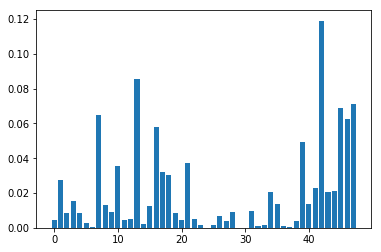

In [1641]:
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_
for i,v in enumerate(importance):
    
	print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [1223]:
q = pd.read_csv('ens_4.csv')

In [1224]:
excel = q['L']

In [1226]:
np.savetxt("excel_NEW.csv", excel, delimiter=",")